# Explanation

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Import a nice function for plotting decision boudaries
#from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("/Users/arib/Downloads/rwf577.csv")
df


,Age,Reduction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [29]:
X = df.TotalWorkingYears
y = df.YearsInCurrentRole

In [30]:

def batch_gradient_descent(X,y, learn_rate = 0.05, epoch = 10):
    m, b = 0.2, 0.2 
    log, mse = [], [] 
    N = len(X) 
    
    for __ in range(epoch):
        f = y - (m * X + b)
        
        #update m and b
        m -= learn_rate * (-2 * X.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m,b))
        mse.append(mean_squared_error(y, (m * X + b)))
        
    return m, b, log, mse

MSE: 6.379453389287852e+88


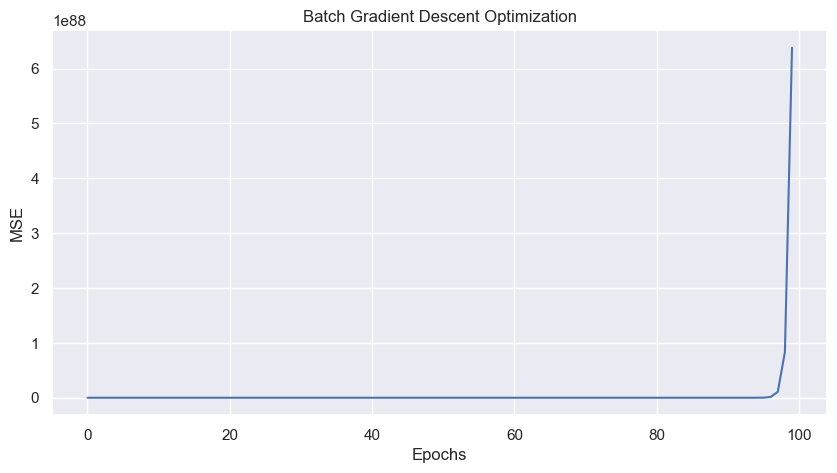

In [31]:
m, b, log, mse = batch_gradient_descent(X, y, learn_rate = 0.01, epoch = 100)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))


plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Batch Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()


In [32]:
def stochastic_gradient_descent(X, y, learn_rate = 0.05, epoch = 10, batch_size=1):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for __ in range(epoch):
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        #updating parameters m and b
        m -= learn_rate * (-2 * Xs.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse


MSE: 93190455101670.25


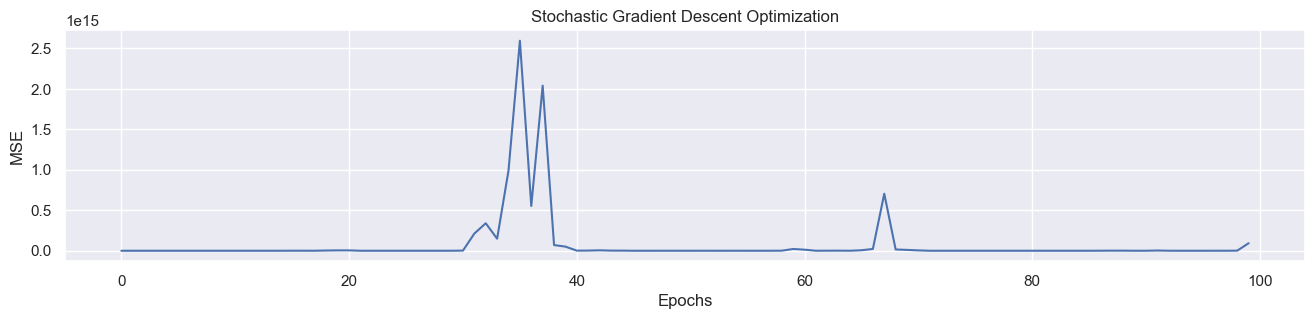

In [33]:
m, b, log, mse = stochastic_gradient_descent(X, y, learn_rate = 0.01, epoch = 100, batch_size=2)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))

#Graphing the results
plt.figure(figsize=(16,3))
plt.plot(range(len(mse)), mse)
plt.title('Stochastic Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()
